## Importing Data and Pre-processing

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('synthetic_data.csv')

# Keeping only relevant columns
# User data (role, frequency, purpose) and trip details
transformed_data = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

# Renaming BTC for ease of display
transformed_data['ISB_Service'] = transformed_data['ISB_Service'].replace('BTC (Bukit Timah Campus)', 'BTC')

# Conversion of time_start from categorical to datetime for later usage
transformed_data['time_start'] = pd.to_datetime(transformed_data['time_start'])
transformed_data


C:\Users\owenl\AppData\Local\Temp\ipykernel_2556\1554315578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['ISB_Service'] = transformed_data['ISB_Service'].replace('BTC (Bukit Timah Campus)', 'BTC')
C:\Users\owenl\AppData\Local\Temp\ipykernel_2556\1554315578.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transformed_data['time_start'] = pd.to_datetime(transformed_data['time_start'])
C:\Users\owenl\AppData\Local\Temp\ipykernel_2556\1554315578.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,role,frequency_of_travel,primary_purpose,travel_days,travel_hours,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration
0,Undergraduate student,Daily,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday","0900 - 1000, 1000 - 1100, 1100 - 1200, 1200 - ...",A2,Opp University Hall,Ventus,Friday,2024-11-10 09:30:00,15 - 20 minutes
1,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","0900 - 1000, 1100 - 1200, 1300 - 1400, 1500 - ...",D2,KR MRT,UTown,Thursday,2024-11-10 09:30:00,10 - 15 minutes
2,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","1700 - 1800, 1800 - 1900, 2100 - 2200, 2200 - ...",A2,UHC,S17,Thursday,2024-11-10 17:50:00,< 5 minutes
3,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1200 - 1300, 1800 - 1900, 2100 - ...",A1,PGP Terminal,Opp UHC,Sunday,2024-11-10 11:30:00,10 - 15 minutes
4,Undergraduate student,1 - 2 days a week,Commute to classes,"Tuesday, Thursday, Friday","0700 - 0800, 1000 - 1100, 1100 - 1200, 1200 - ...",A1,KR MRT,LT27,Friday,2024-11-10 07:50:00,< 5 minutes
...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,"Monday, Wednesday, Friday","0900 - 1000, 1100 - 1200, 1600 - 1700",K,KR MRT,CLB,Friday,2024-11-10 09:24:30,5 - 10 minutes
55846,Visitor,Less than once a week,Travelling to food establishments,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1400 - 1500, 1500 - 1600, 1600 - ...",A1,KR MRT,CLB,Sunday,2024-11-10 18:50:01,10 - 15 minutes
55847,Undergraduate student,1 - 2 days a week,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday, ...","0900 - 1000, 1100 - 1200, 1200 - 1300, 1500 - ...",A1,LT13,KR MRT,Friday,2024-11-10 11:41:45,5 - 10 minutes
55848,Undergraduate student,1 - 2 days a week,Commute to classes,"Monday, Tuesday, Thursday, Friday","1100 - 1200, 1200 - 1300",A2,Opp YIH,S17,Tuesday,2024-11-10 11:45:45,< 5 minutes


## Travel Pattern Visualisation

### General split of ISB Service usage

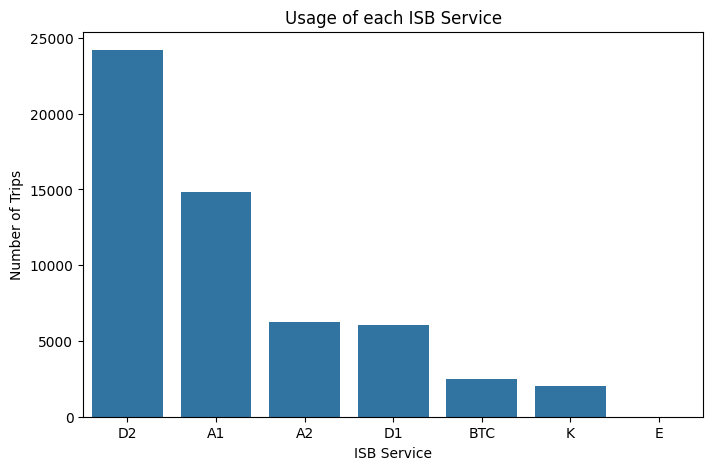

In [7]:
plt.figure(figsize = (8, 5))
sns.countplot(data = transformed_data, x = 'ISB_Service',
              order = transformed_data['ISB_Service'].value_counts().index)
plt.title("Usage of each ISB Service")
plt.xlabel("ISB Service")
plt.ylabel("Number of Trips")
plt.show()

### Bus Usage on Each Day

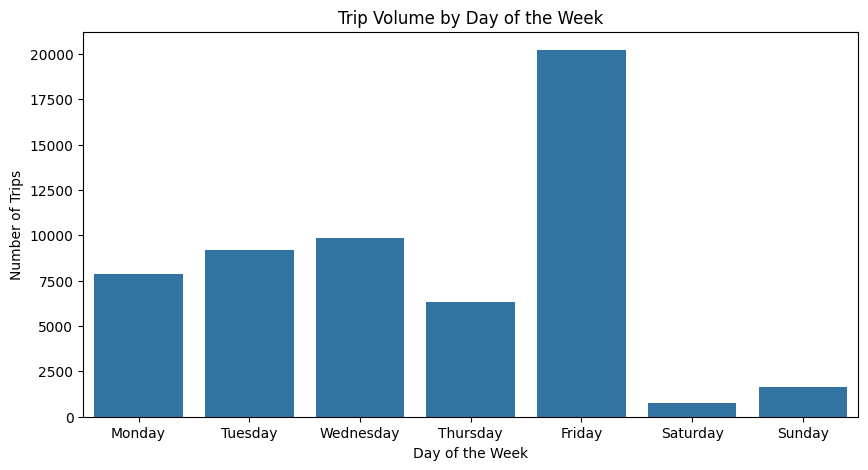

In [8]:
plt.figure(figsize = (10, 5))
sns.countplot(data = transformed_data, x = 'day_of_the_week',
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Trip Volume by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.show()

### Travel Patterns across the Average Day

C:\Users\owenl\AppData\Local\Temp\ipykernel_2556\3647581313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['hour'] = transformed_data['time_start'].dt.hour


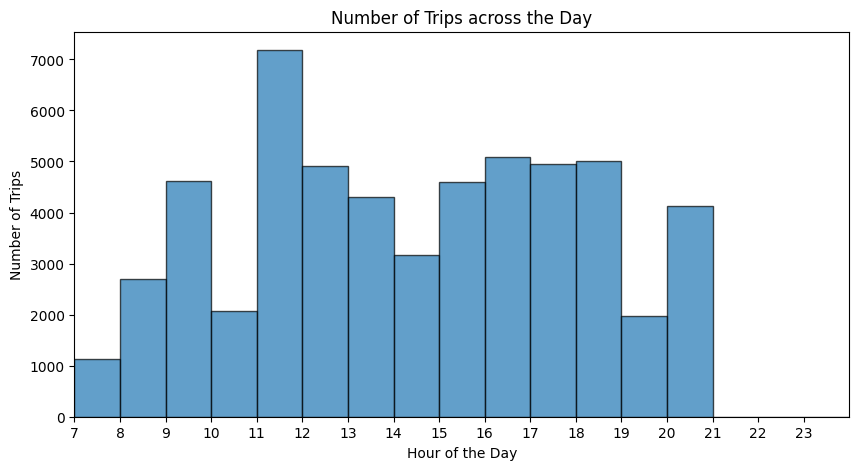

In [9]:
# Trips per hour (based on user-submitted "most common trips")
transformed_data['hour'] = transformed_data['time_start'].dt.hour
plt.figure(figsize = (10, 5))
plt.hist(transformed_data['hour'], bins = range(0, 25), alpha = 0.7, edgecolor = 'black')
plt.title("Number of Trips across the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(7, 24))
plt.xlim(7, 24)
plt.show()

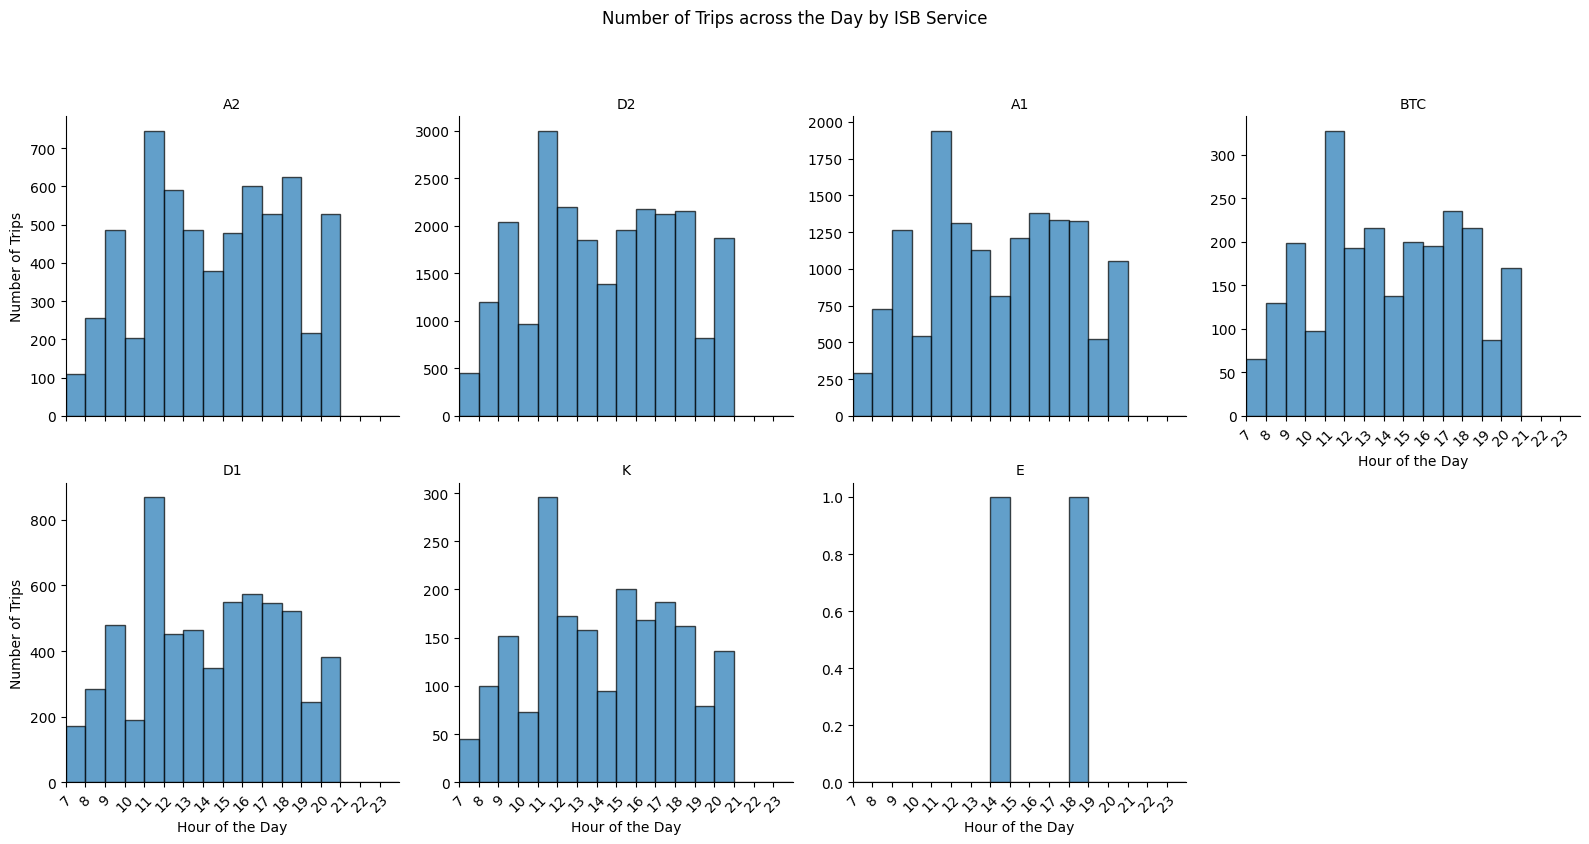

In [10]:
# FacetGrid to facet by ISB_Service
g = sns.FacetGrid(transformed_data, col='ISB_Service', col_wrap=4, height=4, sharey=False)
g.map(plt.hist, 'hour', bins = range(0, 25), alpha = 0.7, edgecolor='black')

g.set_axis_labels("Hour of the Day", "Number of Trips")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xticks(range(7, 24))
    ax.set_xlim(7, 24)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

g.fig.suptitle("Number of Trips across the Day by ISB Service", y=1.05)
plt.tight_layout()

plt.show()

Here we note that for the service 'number' 'E', there are only 2 trips recorded in the data set.

### Distribution of Travel Durations for Trips using each Bus Service

C:\Users\owenl\AppData\Local\Temp\ipykernel_2556\1381195733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['travel_duration'] = pd.Categorical(
C:\Users\owenl\AppData\Local\Temp\ipykernel_2556\1381195733.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_data = transformed_data.groupby(['ISB_Service', 'travel_duration']).size().reset_index(name='count')
c:\Users\owenl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

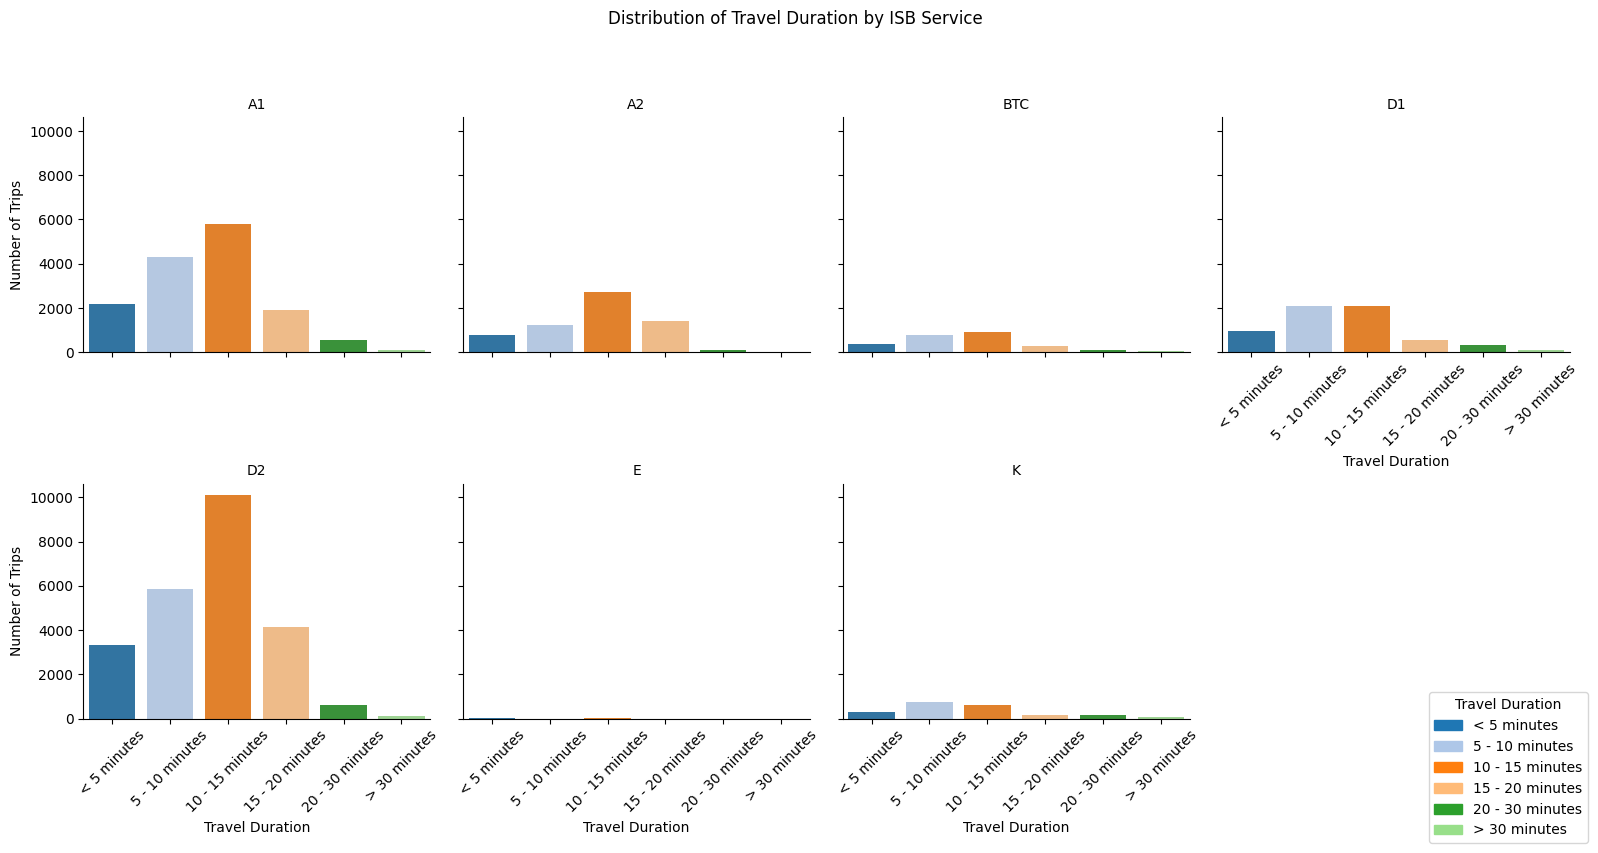

In [11]:
import matplotlib.patches as mpatches

# Setting an ordering for travel_duration
travel_duration_order = ['< 5 minutes', '5 - 10 minutes',
                         '10 - 15 minutes', '15 - 20 minutes',
                         '20 - 30 minutes', '> 30 minutes']
transformed_data['travel_duration'] = pd.Categorical(
    transformed_data['travel_duration'], categories=travel_duration_order, ordered=True)

# Count the number of trips by ISB_Service and travel_duration
segmentation_data = transformed_data.groupby(['ISB_Service', 'travel_duration']).size().reset_index(name='count')

# Create a FacetGrid with a bar plot for each ISB_Service
g = sns.FacetGrid(segmentation_data, col='ISB_Service', col_wrap=4, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='travel_duration', y='count',
                order=travel_duration_order, palette="tab20")

# Customising the plot
g.set_titles("{col_name}")  # Title for each subplot
g.set_axis_labels("Travel Duration", "Number of Trips")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Super title for the full plot
g.fig.suptitle("Distribution of Travel Duration by ISB Service", y = 1.05)
plt.tight_layout()

# Manually create a legend for travel_duration
handles = [mpatches.Patch(
    color = sns.color_palette("tab20")[i],
    label = travel_duration_order[i]) for i in range(len(travel_duration_order))]
g.fig.legend(handles = handles, title = 'Travel Duration',
             loc = 'lower right', bbox_to_anchor = (1, 0), ncol = 1)

plt.show()

### Activity at Each Bus Stop (segregated by service)

<Figure size 1000x500 with 0 Axes>

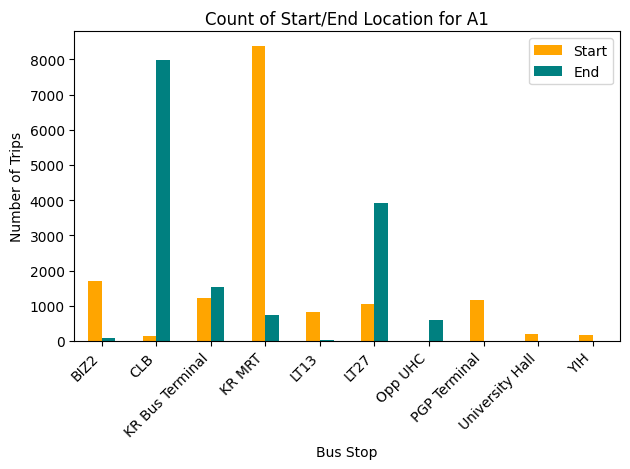

<Figure size 1000x500 with 0 Axes>

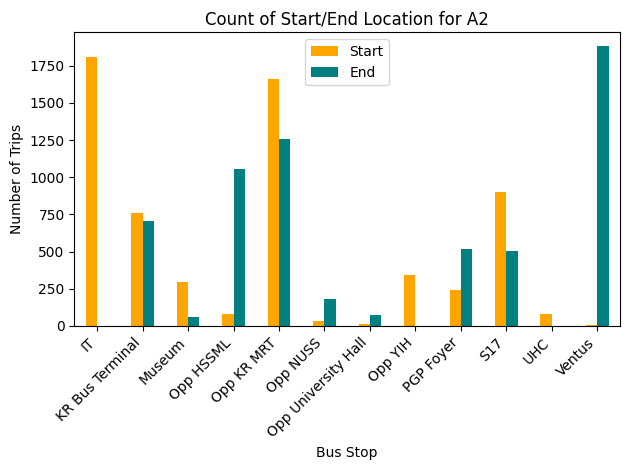

<Figure size 1000x500 with 0 Axes>

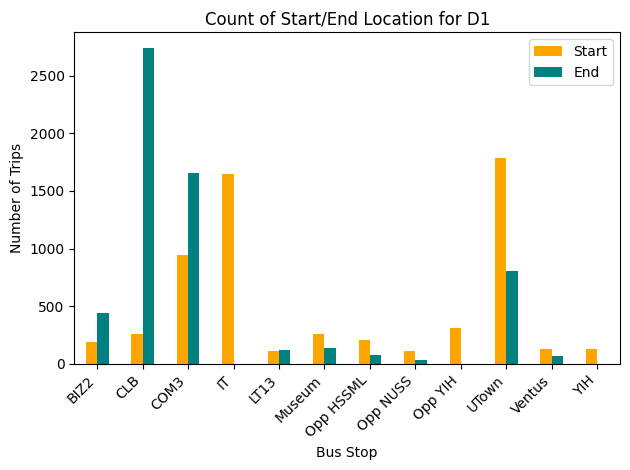

<Figure size 1000x500 with 0 Axes>

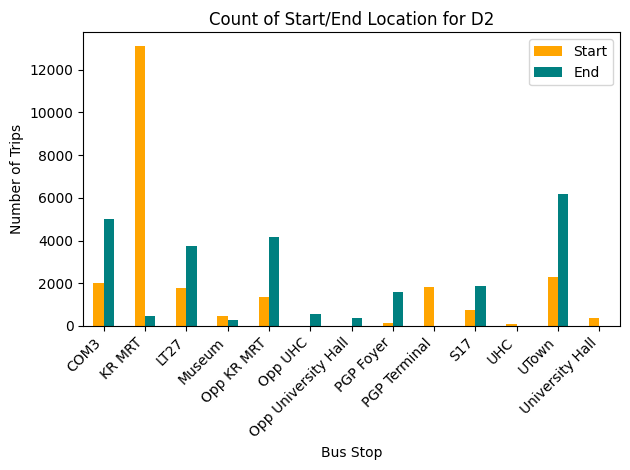

<Figure size 1000x500 with 0 Axes>

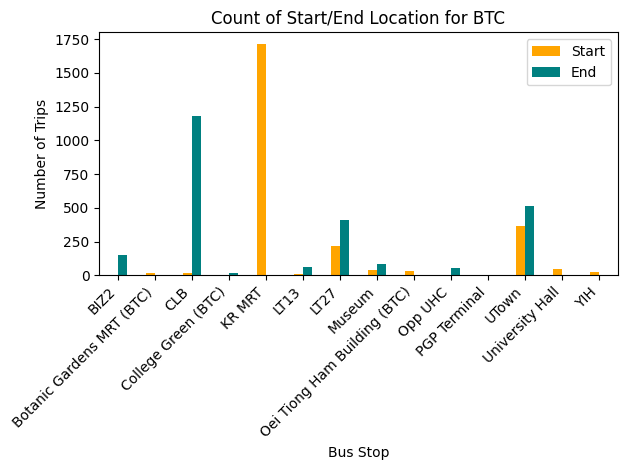

<Figure size 1000x500 with 0 Axes>

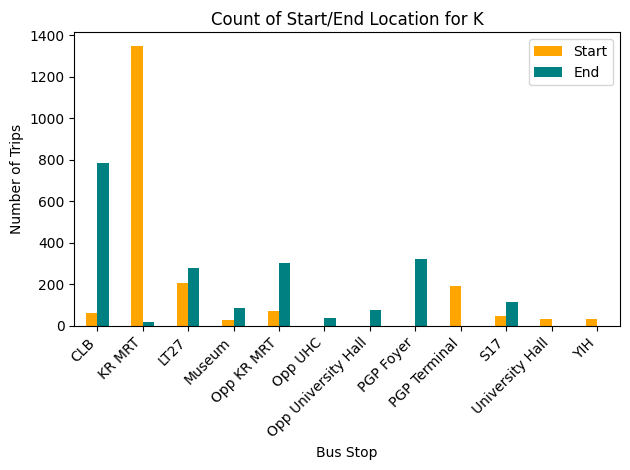

In [20]:
from collections import Counter

# Bus stops for each bus service
A1_bus = ['KR Bus Terminal', 'LT13', 'AS5', 'BIZ2', 'Opp TCOMS', 'PGP Terminal', 'KR MRT', 'LT27', 
          'University Hall', 'Opp UHC', 'YIH', 'CLB', 'KR Bus Terminal']
A2_bus = ['KR Bus Terminal', 'IT', 'Opp YIH', 'Museum', 'UHC', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer', 'TCOMS', 'Opp HSSML', 'Opp NUSS', 'Ventus', 'KR Bus Terminal']
D1_bus = ['COM3', 'Opp HSSML', 'Opp NUSS', 'Ventus', 'IT', 'Opp YIH', 'Museum', 'UTown', 'YIH', 'CLB', 'LT13', 'AS5', 'BIZ2', 'COM3']
D2_bus = ['COM3', 'Opp TCOMS', 'PGP Terminal', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'Museum', 'UTown', 'UHC', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer', 'TCOMS', 'COM3']
BTC_bus = ['Oei Tiong Ham Building (BTC)', 'Botanic Gardens MRT (BTC)', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'UTown', 'Raffles Hall', 'Kent Vale', 'Museum', 'YIH', 'CLB', 'LT13', 'AS5', 'BIZ2', 'PGP Terminal', 'College Green (BTC)', 'Oei Tiong Ham Building (BTC)']
E_bus = ['UTown', 'Raffles Hall', 'Kent Vale', 'EA', 'SDE3', 'IT', 'Opp YIH', 'UTown']
K_bus = ['PGP Terminal', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'YIH', 'CLB', 'Opp SDE3', 'The Japanese Primary School', 'Kent Vale', 'Museum', 'University Health Centre', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer']

bus_service_stops = {
    'A1': A1_bus,
    'A2': A2_bus,
    'D1': D1_bus,
    'D2': D2_bus,
    'BTC': BTC_bus,
    'K': K_bus
}

# Function to plot the count of start/end points for each bus stop, split by bus service
def plot_trip_counts(data, bus_service_stops):
    for service, stops in bus_service_stops.items():
        trips = data[data['ISB_Service'] == service]
        start_counter = Counter()
        end_counter = Counter()

        # Count the occurrences of start and end points
        for _, row in trips.iterrows():
            if row['bus_stop_board'] in stops:
                start_counter[row['bus_stop_board']] += 1
            if row['bus_stop_alight'] in stops:
                end_counter[row['bus_stop_alight']] += 1

        start_df = pd.DataFrame(start_counter.items(), columns = ['Bus Stop', 'Start Count'])
        end_df = pd.DataFrame(end_counter.items(), columns = ['Bus Stop', 'End Count'])

        merged_df = pd.merge(start_df, end_df, on='Bus Stop', how='outer').fillna(0)
        
        plt.figure(figsize = (10, 5))
        merged_df.set_index('Bus Stop').plot(kind = 'bar', stacked = False, color = ['orange', 'teal'])
        
        plt.title(f"Count of Start/End Location for {service}")
        plt.xlabel("Bus Stop")
        plt.ylabel("Number of Trips")
        plt.xticks(rotation = 45, ha = 'right')
        plt.legend(["Start", "End"])
        plt.tight_layout()
        plt.show()

plot_trip_counts(transformed_data, bus_service_stops)

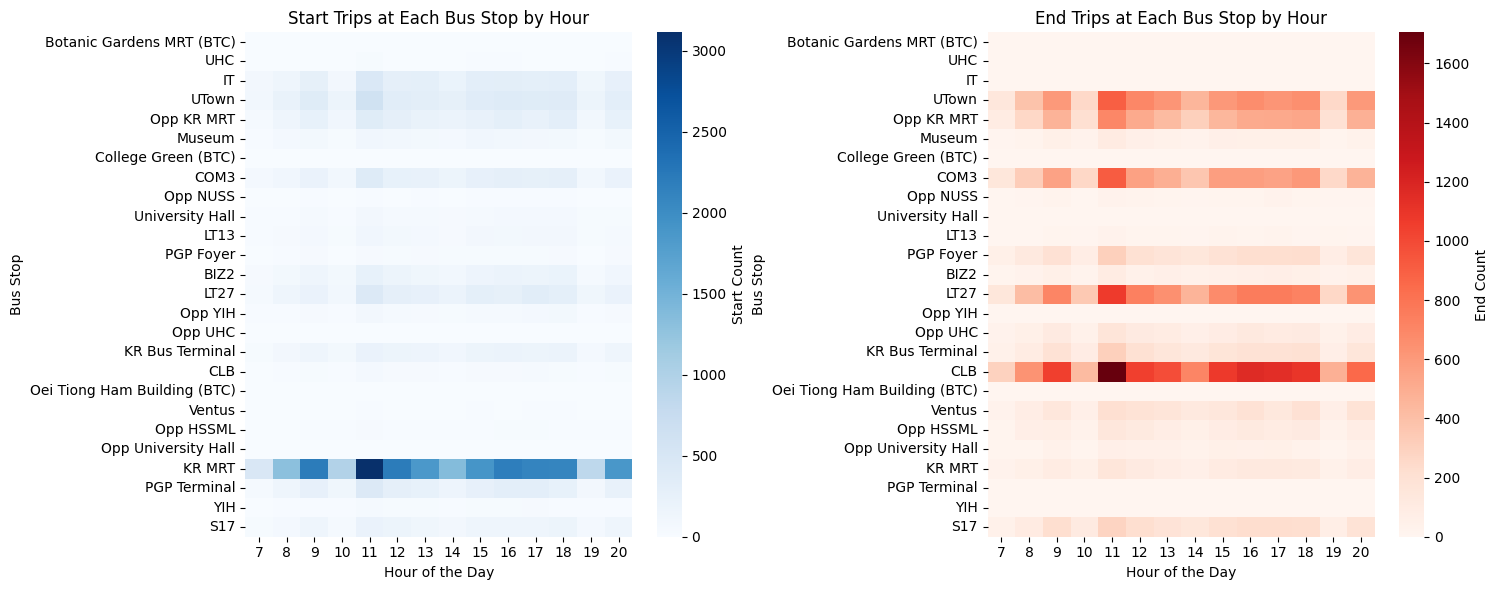

In [19]:
def plot_hourly_trip_counts(data):
    # Count start trips (boarding) and end trips (alighting) at each bus stop for each hour
    start_counts = data.groupby(['bus_stop_board', 'hour']).size().unstack(fill_value=0)
    end_counts = data.groupby(['bus_stop_alight', 'hour']).size().unstack(fill_value=0)
    
    # Combine both start and end counts
    all_bus_stops = set(start_counts.index).union(set(end_counts.index))
    
    # Reindex to include all bus stops for both start and end counts
    start_counts = start_counts.reindex(all_bus_stops, fill_value=0)
    end_counts = end_counts.reindex(all_bus_stops, fill_value=0)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot for start trips
    sns.heatmap(start_counts, cmap='Blues', cbar_kws={'label': 'Start Count'}, ax=axes[0])
    axes[0].set_title('Start Trips at Each Bus Stop by Hour')
    axes[0].set_xlabel('Hour of the Day')
    axes[0].set_ylabel('Bus Stop')
    
    # Plot for end trips
    sns.heatmap(end_counts, cmap='Reds', cbar_kws={'label': 'End Count'}, ax=axes[1])
    axes[1].set_title('End Trips at Each Bus Stop by Hour')
    axes[1].set_xlabel('Hour of the Day')
    axes[1].set_ylabel('Bus Stop')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_hourly_trip_counts(transformed_data)